# Figure Generator - Individual Sets

In [2]:
# Makes possible to show the output from matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

# Makes the figures in the PNG format:
# For more information see %config InlineBackend
%config InlineBackend.figure_formats=set([u'png'])

# plt.rcParams['figure.figsize'] = 5, 10

import numpy
import sys
import os

import save_load_file as slf

from generates_lsm_start import *

In [3]:
import matplotlib 

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

font = {'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

# matplotlib.rcdefaults() # restores to the default values

# http://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc

# Main functions to the 2 joint arm simulation

In [4]:
from simulation_2DoF_Arm_physics import *
# reload(sys.modules['simulation_2DoF_Arm_physics']) # Makes sure the interpreter is going to reload the module

# Start of the simulation!

In [5]:
trajectories = [[[0.75,0.25],[0.0,0.5]],\
                [[0.25,0.60],[-0.25,0.60]],\
                [[-0.10,0.75],[-0.10,0.25]],\
                [[-0.75,0.50],[-0.40,0.00]]]

In [6]:
# First the arm parametres according to Joshi/Maass paper
aparams = {
    'l1' : 0.5, # metres
    'l2' : 0.5,
    'lc1' : 0.25,
    'lc2' : 0.25,
    'm1' : 1.0, # kg
    'm2' : 1.0,
    'i1' : 0.03, # kg*m*m
    'i2' : 0.03
}

In [7]:
# Total time spent during the movement (in seconds)
MT = 0.5
# Simulation time step (in seconds)
time_step = 2/1000.0
# Number of neurons at each input layer (defines the resolution of the system)
Ninput = 50

In [8]:
t_mov=numpy.arange(0, MT, time_step) # t starts in 0s and steps time_step(s) until reaches MT(s)

In [50]:
# Experiment identifier
sim_sets = ["set_A", "set_B", "set_C", "set_D"]

sim_set = sim_sets[0]


total_trials = 50

base_dir = "2DofArm_simulation_data"

# Reads all the experiments to check which range of torques is necessary to control the arm
# These values are based ONLY in the 4 trajectories used!
torques_all_1 = numpy.array([]);
torques_all_2 = numpy.array([]);
number_of_trajectories = len(trajectories)
for i in range(1,number_of_trajectories+1):
    states,torques = slf.load_from_file_gz("./"+base_dir+"/"+sim_set+"/States_Torques_movement"+str(i)+".gzpickle")
    torques_all_1 = numpy.concatenate((torques_all_1,torques[:,0])) # torques joint 1
    torques_all_2 = numpy.concatenate((torques_all_2,torques[:,1])) # torques joint 2

In [51]:
# Creates the 50 possible discrete values of torques for each joint (probably will be different)
torques_values_1=numpy.linspace(torques_all_1.min(),torques_all_1.max(),num=50)
torques_values_2=numpy.linspace(torques_all_2.min(),torques_all_2.max(),num=50)

In [52]:
# Creates the 50 possible discrete values of angles for each joint
teta1_values=numpy.linspace(-numpy.pi/6,numpy.pi,num=50)
teta2_values=numpy.linspace(0,numpy.pi,num=50)

In [53]:
# These are the 50 possible values that the input neurons will represent (x,y) 
x_values=numpy.linspace(-1,1,num=50)
y_values=numpy.linspace(-1,1,num=50)

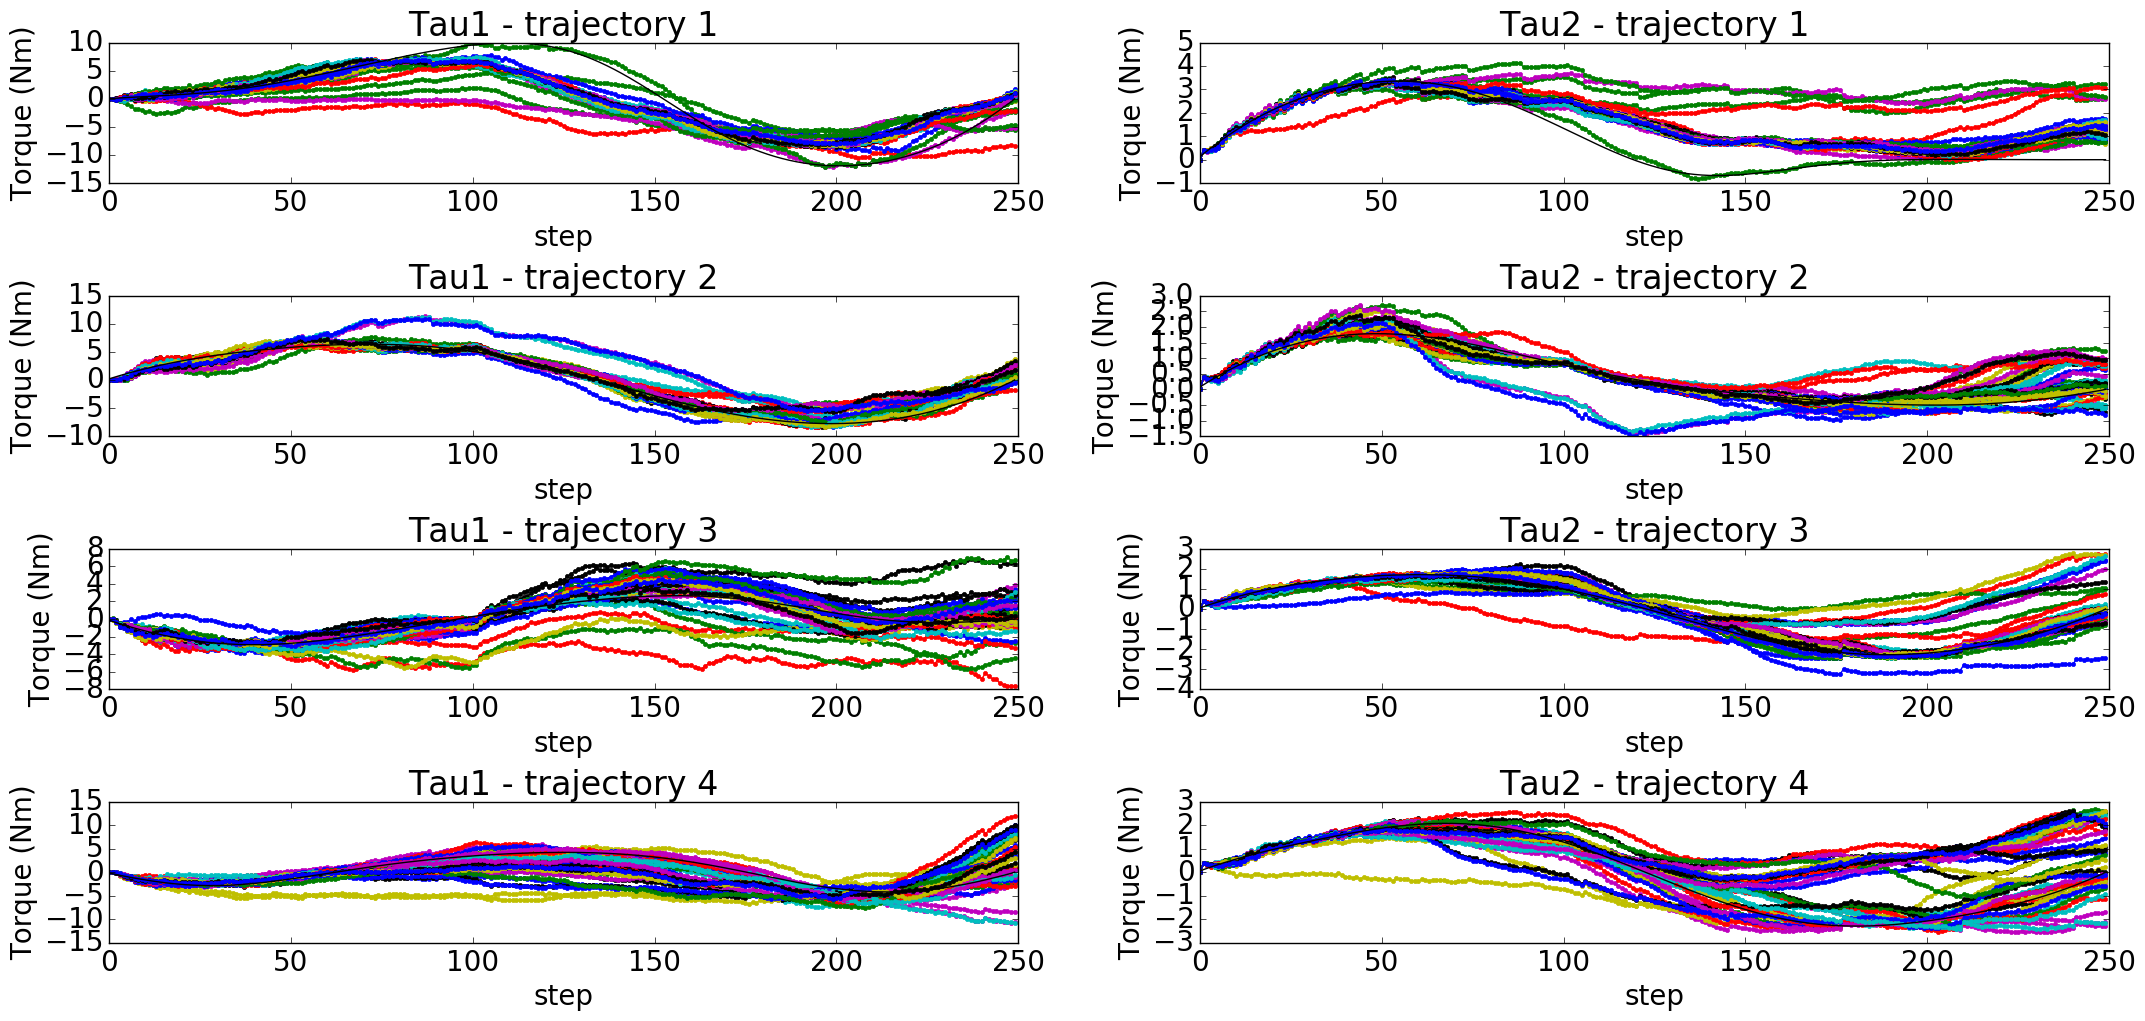

In [54]:
noiselevel=0
decimationlevel=0

plt.figure(figsize =(20,10))

subploti=1
for tji in range(1,5):
    torques_original = numpy.array([torques_all_1[(tji-1)*250:(tji)*250],torques_all_2[(tji-1)*250:(tji)*250]])
    # x_lsm,y_lsm,xstart,ystart,xdest,ydest = generates_lsm_start(tji,trajectories,x_values,y_values)
    ymin = numpy.array([torques_all_1.min(),torques_all_2.min()]).min()
    ymax = numpy.array([torques_all_1.max(),torques_all_2.max()]).max()

    torques_read_1=numpy.zeros((total_trials,250))
    torques_read_2=numpy.zeros((total_trials,250))


    plt.subplot(4,2,subploti)
    for run_number in range(1,total_trials+1):
        torques = slf.load_from_file("./"+base_dir+"/"+sim_set+"/torques_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
        torques_read_1[run_number-1] = numpy.copy(torques[:,0])
        plt.plot(torques[:,0],'.-',label="Tau1 Calculated")
    plt.plot(torques_original[0,:],'k-',label="Tau1 Original")
    plt.ylabel("Torque (Nm)")
    plt.xlabel("step")
    plt.title("Tau1 - trajectory " + str(tji))
    plt.xlim(0,250)
    # plt.legend()

    plt.subplot(4,2,subploti+1)
    subploti+=2
    for run_number in range(1,total_trials+1):
        torques = slf.load_from_file("./"+base_dir+"/"+sim_set+"/torques_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
        torques_read_2[run_number-1] = numpy.copy(torques[:,1])
        plt.plot(torques[:,1],'.-',label="Tau2 Calculated")
    plt.plot(torques_original[1,:],'k-',label="Tau2 Original")
    plt.xlim(0,250)
    plt.ylabel("Torque (Nm)")
    plt.xlabel("step")
    plt.title("Tau2 - trajectory " + str(tji))
    # plt.ylim(ymin,ymax)
    # plt.legend()
    
plt.subplots_adjust(left=0, bottom=.1, right=1, top=1, wspace=.2, hspace=.8)
# plt.savefig("./"+base_dir+"/"+sim_set+"/readout_testing_all_"+sim_set+".pdf", bbox_inches='tight',pad_inches=1)
plt.show()

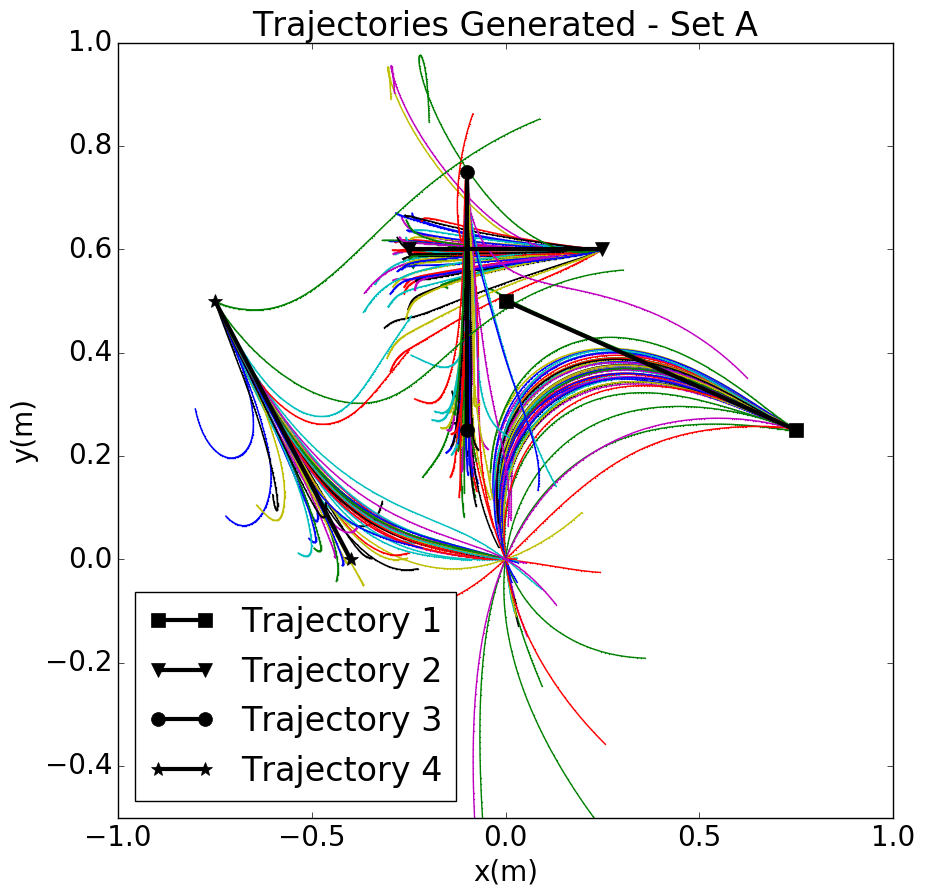

In [55]:
plt.figure(figsize =(10,10))

for tji in [1,2,3,4]:
    x_lsm,y_lsm,xstart,ystart,xdest,ydest = generates_lsm_start(tji,trajectories,x_values,y_values)
    for run_number in range(1,total_trials+1):
        teta = slf.load_from_file("./"+base_dir+"/"+sim_set+"/teta_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
        H,E = joints_to_hand(teta,aparams)
        plt.plot(H[:,0],H[:,1],'.-',markersize=1)
for tji in [1,2,3,4]:
    x_lsm,y_lsm,xstart,ystart,xdest,ydest = generates_lsm_start(tji,trajectories,x_values,y_values)
    plt.plot([xstart,xdest],[ystart,ydest],['ks-','kv-','ko-','k*-'][tji-1], markersize=10, linewidth=3, label='Trajectory '+str(tji))

# plt.title("Trajectories Generated - Set " + sim_set[-1])
plt.xlabel("x(m)")
plt.ylabel("y(m)")

plt.xlim(-1,1)
plt.ylim(-.5,1)

plt.legend(loc=0)
plt.savefig("All_Trajectories_"+sim_set+".png", bbox_inches='tight',pad_inches=1,dpi=300)
# plt.show()

In [154]:
#
# Calculates the DTW for all the trials - forward kinematic
#
import dtw_python
    
for tji in range(1,5):
    dtw_total_cost=numpy.zeros((3,3,50),dtype=numpy.float)
    x_lsm,y_lsm,xstart,ystart,xdest,ydest = generates_lsm_start(tji,trajectories,x_values,y_values)
    for noiselevel in range(3):
        for decimationlevel in range(3):
            H_path=numpy.ascontiguousarray(cartesian_movement_generation_training(xstart, ystart, xdest, ydest, MT, t_mov))
            for run_number in range(1,total_trials+1):
                teta = slf.load_from_file("./"+base_dir+"/"+sim_set+"/teta_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
                H,_ = joints_to_hand(teta,aparams)
                dist_matrix = dtw_python.distances_matrix(H_path,H)
                accumulated_cost = dtw_python.accumulated_cost_matrix(H_path,H,dist_matrix)        
                _, cost = dtw_python.path_cost_calculation(H_path,H, dist_matrix, accumulated_cost)
                dtw_total_cost[noiselevel,decimationlevel,run_number-1] = cost
        
    numpy.save("./"+base_dir+"/"+sim_set+"/metric_trajectory_trajectory_"+str(tji)+".npy",dtw_total_cost)   
    # dtw_total_cost[noiselevel,decimationlevel,run_number-1]
    # 3x3x50 => 450 trials
        

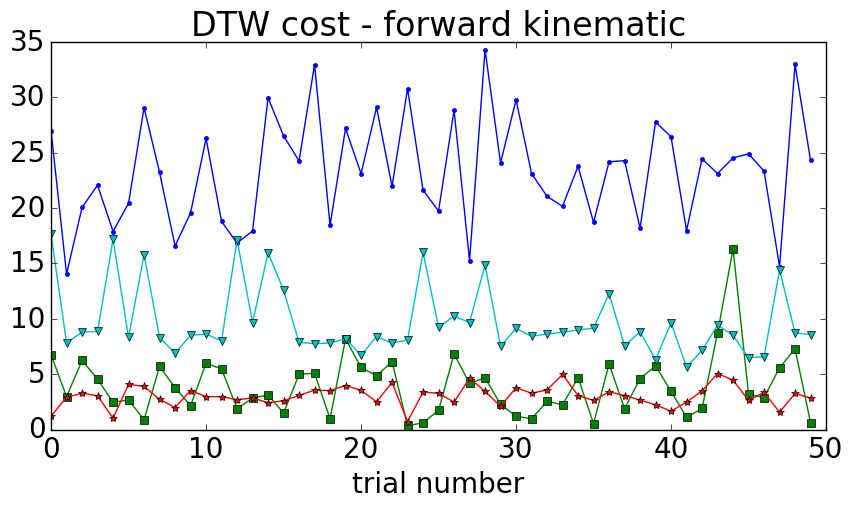

In [100]:
noiselevel = 0
decimationlevel = 0

style_tji = ['.-','s-','*-','v-']
plt.figure(figsize =(10,5))
for tji in range(4):
    dtw_total_cost = numpy.load("./"+base_dir+"/"+sim_set+"/metric_trajectory_trajectory_"+str(tji+1)+".npy")   
    plt.plot(dtw_total_cost[noiselevel,decimationlevel,:], style_tji[tji], label="Trajectory "+str(tji+1))
    plt.title("DTW cost - forward kinematic")
    plt.xlabel("trial number")
#     plt.legend(loc=0)
plt.show()

In [156]:
#
# Calculates the DTW for all the trials - torque curves
#
import dtw_python
    
for tji in range(1,5):
    dtw_total_cost=numpy.zeros((3,3,2,50),dtype=numpy.float)
    x_lsm,y_lsm,xstart,ystart,xdest,ydest = generates_lsm_start(tji,trajectories,x_values,y_values)
    _,torques_original = slf.load_from_file_gz("./"+base_dir+"/"+sim_set+"/States_Torques_movement"+str(i)+".gzpickle")
    for noiselevel in range(3):
        for decimationlevel in range(3):
            for run_number in range(1,total_trials+1):
                torques = slf.load_from_file("./"+base_dir+"/"+sim_set+"/torques_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")
                for tau in range(2):
                    dist_matrix = dtw_python.distances_matrix(torques_original[:,tau],torques[:,tau])
                    accumulated_cost = dtw_python.accumulated_cost_matrix(torques_original[:,tau],torques[:,tau],dist_matrix)
                    _, cost = dtw_python.path_cost_calculation(torques_original[:,tau],torques[:,tau],dist_matrix, accumulated_cost)
                    dtw_total_cost[noiselevel,decimationlevel,tau,run_number-1] = cost
        
    numpy.save("./"+base_dir+"/"+sim_set+"/metric_torques_trajectory_"+str(tji)+".npy",dtw_total_cost)   
    # dtw_total_cost[noiselevel,decimationlevel,tau,run_number-1]
    # 3x3x2x50 => 450 trials (900 values)
        

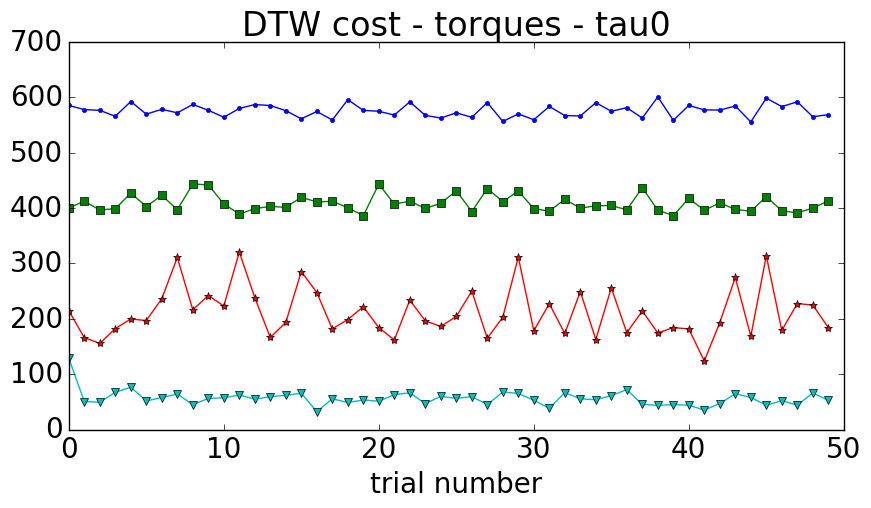

In [99]:
style_tji = ['.-','s-','*-','v-']

tau = 0
plt.figure(figsize =(10,5))
for tji in range(4):
    dtw_total_cost = numpy.load("./"+base_dir+"/"+sim_set+"/metric_torques_trajectory_"+str(tji+1)+".npy")   
    plt.plot(dtw_total_cost[0,0,tau,:], style_tji[tji], label="Trajectory "+str(tji+1))
    plt.title("DTW cost - torques - tau"+str(tau))
    plt.xlabel("trial number")
#     plt.legend(loc=0)
plt.show()

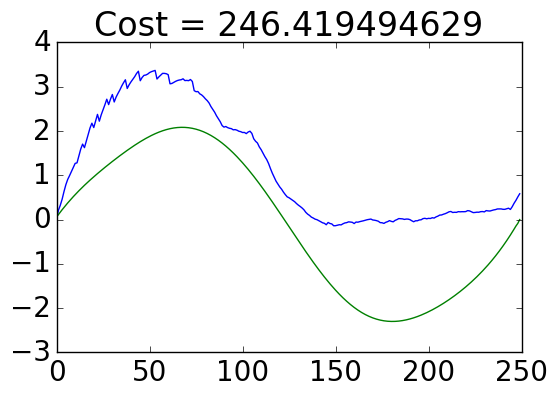

In [158]:
noiselevel=0
decimationlevel=0
run_number=1
tji=1
tau=1
_,torques_original = slf.load_from_file_gz("./"+base_dir+"/"+sim_set+"/States_Torques_movement"+str(i)+".gzpickle")
torques = slf.load_from_file("./"+base_dir+"/"+sim_set+"/torques_"+str(tji)+"_noise_level_"+str(noiselevel)+"_killed_neurons_"+str(decimationlevel)+"_run_"+str(run_number)+".pickles")

dist_matrix = dtw_python.distances_matrix(torques_original[:,tau],torques[:,tau])
accumulated_cost = dtw_python.accumulated_cost_matrix(torques_original[:,tau],torques[:,tau],dist_matrix)
_, cost = dtw_python.path_cost_calculation(torques_original[:,tau],torques[:,tau],dist_matrix, accumulated_cost)

plt.plot(torques[:,tau])
plt.plot(torques_original[:,tau])
plt.title("Cost = "+str(cost))
plt.show()

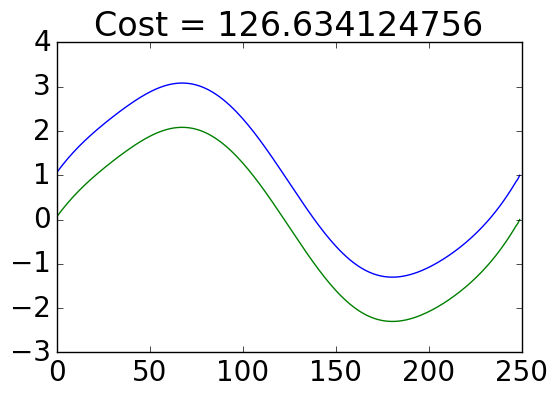

In [159]:
noiselevel=0
decimationlevel=0
run_number=1
tji=1
tau=1
_,torques_original = slf.load_from_file_gz("./"+base_dir+"/"+sim_set+"/States_Torques_movement"+str(i)+".gzpickle")
torques = torques_original+1

dist_matrix = dtw_python.distances_matrix(torques_original[:,tau],torques[:,tau])
accumulated_cost = dtw_python.accumulated_cost_matrix(torques_original[:,tau],torques[:,tau],dist_matrix)
_, cost = dtw_python.path_cost_calculation(torques_original[:,tau],torques[:,tau],dist_matrix, accumulated_cost)

plt.plot(torques[:,tau])
plt.plot(torques_original[:,tau])
plt.title("Cost = "+str(cost))
plt.show()